In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np 
import random
from sklearn.preprocessing import PolynomialFeatures

In [17]:
import pandas as pd

df = pd.read_csv("housing_in_london_monthly_variables.csv")
#df = df.drop('no_of_crimes', axis=1)

nanvalue = df[df['houses_sold'].isna()].index
#df = df.drop(nanvalue, axis=0).reset_index(drop=True)

# Checking percentage of missing values in columns
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False)

,Nulls
no_of_crimes,45.10
houses_sold,0.69
date,0.00
area,0.00
average_price,0.00
code,0.00
borough_flag,0.00


In [3]:
import pandas as pd

data = pd.read_csv("housing_in_london_monthly_variables.csv")

In [4]:
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [6]:
data_aux = data [data["houses_sold"].notna()]

In [7]:
data_aux.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13455 entries, 0 to 13546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13455 non-null  object 
 1   area           13455 non-null  object 
 2   average_price  13455 non-null  int64  
 3   code           13455 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7375 non-null   float64
 6   borough_flag   13455 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 840.9+ KB


c:\Users\claud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

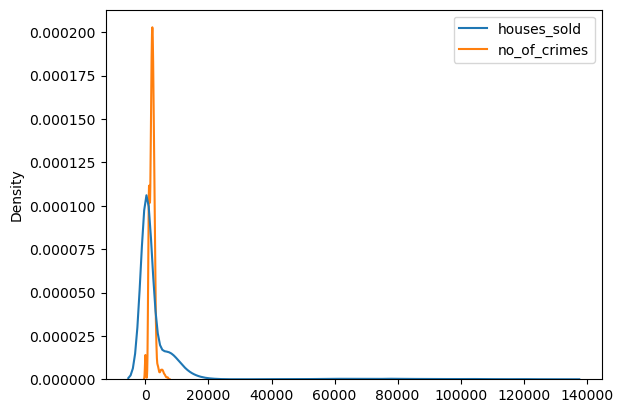

In [8]:
sns.kdeplot(data_aux[["houses_sold", "no_of_crimes"]])

In [9]:
data_aux['area'].value_counts()

area
city of london            299
lambeth                   299
merton                    299
newham                    299
redbridge                 299
richmond upon thames      299
southwark                 299
sutton                    299
waltham forest            299
wandsworth                299
westminster               299
inner london              299
outer london              299
north east                299
north west                299
yorks and the humber      299
east midlands             299
west midlands             299
east of england           299
london                    299
south west                299
lewisham                  299
kingston upon thames      299
barking and dagenham      299
kensington and chelsea    299
barnet                    299
bexley                    299
brent                     299
bromley                   299
camden                    299
croydon                   299
ealing                    299
enfield                   299
tower

In [16]:
print(data_aux.groupby(by='area')[['houses_sold']].mean().head())


                      houses_sold
area                             
barking and dagenham   198.989967
barnet                 446.983278
bexley                 325.588629
brent                  272.953177
bromley                496.709030


In [14]:
data_aux['borough_flag'].value_counts()

borough_flag
1    9867
0    3588
Name: count, dtype: int64

In [20]:
data_aux['code'].value_counts()

code
E09000001    299
E09000022    299
E09000024    299
E09000025    299
E09000026    299
E09000027    299
E09000028    299
E09000029    299
E09000031    299
E09000032    299
E09000033    299
E13000001    299
E13000002    299
E12000001    299
E12000002    299
E12000003    299
E12000004    299
E12000005    299
E12000006    299
E12000007    299
E12000009    299
E09000023    299
E09000021    299
E09000002    299
E09000020    299
E09000003    299
E09000004    299
E09000005    299
E09000006    299
E09000007    299
E09000008    299
E09000009    299
E09000010    299
E09000030    299
E09000011    299
E09000012    299
E12000008    299
E09000013    299
E09000014    299
E09000015    299
E09000016    299
E09000017    299
E09000018    299
E09000019    299
E92000001    299
Name: count, dtype: int64

In [23]:
pd.crosstab(data_aux['area'],data_aux['code'])

code,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,...,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,E13000001,E13000002,E92000001
area,,,,,,,,,,,,,,,,,,,,,
barking and dagenham,0,299,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
barnet,0,0,299,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bexley,0,0,0,299,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brent,0,0,0,0,299,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bromley,0,0,0,0,0,299,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
camden,0,0,0,0,0,0,299,0,0,0,...,0,0,0,0,0,0,0,0,0,0
city of london,299,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
croydon,0,0,0,0,0,0,0,299,0,0,...,0,0,0,0,0,0,0,0,0,0
ealing,0,0,0,0,0,0,0,0,299,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data_aux = data_aux.drop('no_of_crimes', axis=1)

data_aux.head()

,date,area,average_price,code,houses_sold,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,1
1,1995-02-01,city of london,82203,E09000001,7.0,1
2,1995-03-01,city of london,79121,E09000001,14.0,1
3,1995-04-01,city of london,77101,E09000001,7.0,1
4,1995-05-01,city of london,84409,E09000001,10.0,1


In [19]:
data_aux = data_aux.drop('date', axis=1)

data_aux.head()

,area,average_price,code,houses_sold,borough_flag
0,city of london,91449,E09000001,17.0,1
1,city of london,82203,E09000001,7.0,1
2,city of london,79121,E09000001,14.0,1
3,city of london,77101,E09000001,7.0,1
4,city of london,84409,E09000001,10.0,1


In [24]:
data_aux = data_aux.drop('code', axis=1)

data_aux.head()

,area,average_price,houses_sold,borough_flag
0,city of london,91449,17.0,1
1,city of london,82203,7.0,1
2,city of london,79121,14.0,1
3,city of london,77101,7.0,1
4,city of london,84409,10.0,1


Vamos a intentar hacer el modelo ':)'

In [41]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np 
import random
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.compose import ColumnTransformer

In [34]:
#Definir variables 

X = data_aux.drop('average_price', axis=1)
y = data_aux['average_price']

In [35]:
y.shape

(13455,)

In [36]:
X.shape

(13455, 3)

In [37]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, shuffle=True)

In [42]:
#model_rl = Pipeline(steps=[("scaler", StandardScaler())])

numeric_features = ['houses_sold', 'borough_flag']

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer (strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["area"]

categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore")),
           ("selector", SelectPercentile(chi2, percentile=50)),
           ]
)

preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features), 
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [46]:
model_rl = Pipeline(
    steps= [("preprocessor", preprocessor), ("reglin", LinearRegression())] 
)

model_sgd = Pipeline(
    steps= [("preprocessor", preprocessor), ("regSGDR", SGDRegressor())] 
)

model_ridge = Pipeline(
    steps= [("preprocessor", preprocessor), ("regRID", Ridge())] 
)

model_lasso = Pipeline(
    steps= [("preprocessor", preprocessor), ("regLASS", Lasso())] 
)

In [47]:
model_rl.fit(X_train, y_train)
print("Modelo Regresion Lineal: %3f" % model_rl.score(X_test, y_test))

model_sgd.fit(X_train, y_train)
print("Modelo SGDR: %3f" % model_sgd.score(X_test, y_test))

model_ridge.fit(X_train, y_train)
print("Modelo Ridge: %3f" % model_ridge.score(X_test, y_test))

model_lasso.fit(X_train, y_train)
print("Modelo Lasso: %3f" % model_lasso.score(X_test, y_test))

Modelo Regresion Lineal: 0.363169
Modelo SGDR: 0.361517
Modelo Ridge: 0.363081
Modelo Lasso: 0.363166


In [52]:
y_predict = model_rl.score(X, y)
print("Coefficient of determination in the training set: ", y_predict)
print("MAE: ", mean_absolute_error (y_test, model_rl.predict(X_test)))
print("MSE: ", mean_squared_error (y_test, model_rl.predict(X_test)))
print("RMSE: ", np.sqrt (mean_squared_error(y_test, model_rl.predict(X_test))))

Coefficient of determination in the training set:  0.3609736548448643
MAE:  111084.30943736435
MSE:  22175965474.140846
RMSE:  148915.9678279695


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [54]:
model_rf_regressor = Pipeline(
    steps= [("preprocessor", preprocessor), ("regramfor", RandomForestRegressor())] 
)

In [55]:
model_rf_regressor.fit(X_train, y_train)
print("Modelo Regressor: %3f" % model_rf_regressor.score(X_test, y_test))

Modelo Regressor: 0.392607


*Tarea: Mejorar el modelo 
Seleccionar variables diferentes 
Modelos de regresion*